## Seeding dynamic for a 2D kinematic driver

#### based on the stratocumulus stream function from Morrison & Grabowski 2007 and setup from Arabas et al. 2015
https://doi.org/10.1175/JAS3980

(see the Arabas et al. 2015 example in PySDM for more details)

In [1]:
import numpy as np

from PySDM import Formulae
from PySDM.physics import in_unit, si
from PySDM_examples.seeding.settings_2d import Settings
from PySDM_examples.seeding.simulation_2d import Simulation
from PySDM_examples.Szumowski_et_al_1998 import Storage
from PySDM_examples.seeding.spin_up_2d import SpinUp

from seeding_utils import sav_as_xarr
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PySDM_examples.Shipway_and_Hill_2012 import plot
from open_atmos_jupyter_utils import show_plot

In [2]:
np.random.seed(123)

common_params = {
    "grid": (25, 25),
    "size": (1500 * si.metres, 1500 * si.metres),
    "simulation_time": 5400 * si.second,
    "dt": 5 * si.second,
    "spin_up_time": 1800 * si.second,
    "particles_per_volume_STP": 50 / si.cm**3,
    "n_sd_per_gridbox": 32,
    "radius": 0.04 * si.micrometre,
    "kappa": .3,
    "z_part": (0., 1),
    "x_part": (0., 1),
    "n_sd_seeding": 62,
    "seed_particles_per_volume_STP": 50 / si.cm**3,
    "seed_radius": 1 * si.micrometre,
    "seed_kappa": .8,
}

settings = Settings(
    Formulae(seed= np.random.randint(1000)),
    **common_params,
    super_droplet_injection_rate = lambda time: 1 if 5 * si.min < time < 10 * si.min else 0,
    )

storage = Storage()
simulation = Simulation(settings, storage, SpinUp= SpinUp)
simulation.reinit()
simulation.run()

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


0.0% (times since last print: cpu=13.2s wall=13.6s)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


1.1% (times since last print: cpu=31.0s wall=31.1s)
2.2% (times since last print: cpu=0.5s wall=0.5s)
3.3% (times since last print: cpu=0.5s wall=0.5s)
4.4% (times since last print: cpu=0.5s wall=0.5s)
5.6% (times since last print: cpu=0.5s wall=0.5s)
6.7% (times since last print: cpu=1.6s wall=1.6s)
7.8% (times since last print: cpu=1.3s wall=1.4s)
8.9% (times since last print: cpu=1.7s wall=1.7s)
10.0% (times since last print: cpu=1.7s wall=1.7s)
11.1% (times since last print: cpu=1.9s wall=1.9s)
12.2% (times since last print: cpu=1.0s wall=1.0s)
13.3% (times since last print: cpu=0.6s wall=0.6s)
14.4% (times since last print: cpu=0.6s wall=0.6s)
15.6% (times since last print: cpu=0.6s wall=0.6s)
16.7% (times since last print: cpu=0.6s wall=0.6s)
17.8% (times since last print: cpu=0.6s wall=0.6s)
18.9% (times since last print: cpu=0.6s wall=0.7s)
20.0% (times since last print: cpu=0.6s wall=0.7s)
21.1% (times since last print: cpu=0.6s wall=0.6s)
22.2% (times since last print: cpu=0.

In [3]:
rain_xarr= sav_as_xarr('rain water mixing ratio', settings= settings, simulation= simulation)
coal_rate_xarr= sav_as_xarr('cor', settings= settings, simulation= simulation)
sd_gridbox_xarr= sav_as_xarr('super droplet count per gridbox', settings= settings, simulation= simulation)

100%|██████████| 91/91 [00:00<00:00, 4174.12it/s]


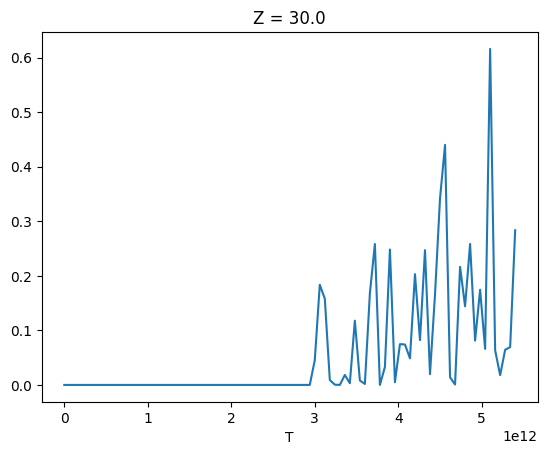

In [4]:
in_unit(rain_xarr.sel(Z= 30).sum(dim= 'X'), si.mm/si.s).plot()

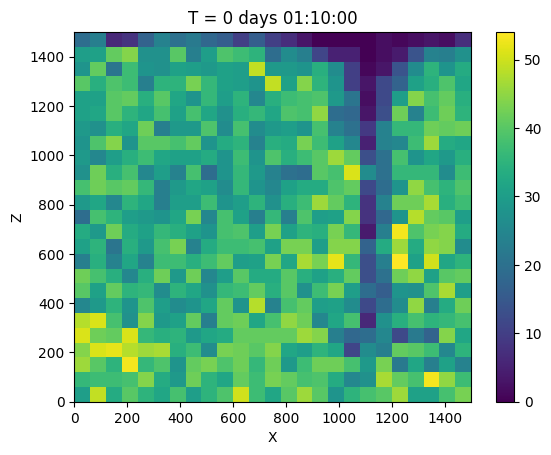

In [5]:
sd_gridbox_xarr[70].plot()